# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


airbnb = pd.read_csv("./data/airbnb_hw.csv",low_memory=False) #importing the data and storing it into a variable
(list(airbnb.columns))

['Host Id',
 'Host Since',
 'Name',
 'Neighbourhood ',
 'Property Type',
 'Review Scores Rating (bin)',
 'Room Type',
 'Zipcode',
 'Beds',
 'Number of Records',
 'Number Of Reviews',
 'Price',
 'Review Scores Rating']

In [10]:
#1

airbnb['Price'] = airbnb['Price'].str.replace(r'[\$,]', '', regex=True) #im removing the dollar sign and the commas from the Price stringsairbnb["Price"] =airbnb["Price"].astype(float) # changing it to a float
airbnb["Price"] = airbnb["Price"].astype(float)
print(airbnb["Price"].mean())
print("There are",airbnb["Price"].isna().sum(),"missing values") #I check to see if there are any missing values
print((airbnb["Price"]<0).any()) #checks to see if there are any price values less than zero

163.58973685937397
There are 0 missing values
False


In [11]:

puof= pd.read_csv("./data/mn_police_use_of_force.csv",low_memory=False)
num_of_missing_injury_reports = puof["subject_injury"].isnull().sum() # counts the amount of missing values
total_num_of_injury_reports = len(puof["subject_injury"]) #the total amount of reports
prop_of_missing_injury_reports = num_of_missing_injury_reports/total_num_of_injury_reports #the proportion of missing reports
print(prop_of_missing_injury_reports, "of all cases go unreported") 
print(total_num_of_injury_reports)


0.7619342359767892 of all cases go unreported
12925


This is value is concerning because it means that over 3/4 cops do not report whether or not there was an injury, which could lead into questions
about whether they are trying to hide the fact that they injured someone as well as other topics of police brutality.

In [12]:

crosstab = pd.crosstab(puof['subject_injury'], puof['force_type']) #creates a cross tab of subject injury and force type
print(crosstab)
"""bodily force seems to be the most common outcome of reported cases where there is injury, which makes sense since the use off weapons are less by
cops compared to the total number of cases. There is likely far more injuries from Bodily force that go unreported since the lack of a use of weapon
is far more likely to be overlook and would cause less damage than that of a weapon"""

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172  


'bodily force seems to be the most common outcome of reported cases where there is injury, which makes sense since the use off weapons are less by\ncops compared to the total number of cases. There is likely far more injuries from Bodily force that go unreported since the lack of a use of weapon\nis far more likely to be overlook and would cause less damage than that of a weapon'

In [13]:
#Q3
#Dummy variable: For the pretrial data covered in the lecture, clean the 
# `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, 
# in particular, replace missing values with `np.nan`.

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
df['sex'] = df['Defendant_Sex'] # Categorical variable example
var = 'sex'

df['age'] = df['Defendant_Age']
df['age'] = pd.to_numeric(df['age'], errors='coerce') # Coerce the variable to numeric


print('After coercion: \n', df['age'].describe(),'\n') 

df["WhetherDefendantWasReleasedPretrial"] = df["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan) #here i replace the missing values in WhetherDefendantWasReleasedPretrial with np.nan

print(df["WhetherDefendantWasReleasedPretrial"].unique()) #checks the unique values in this column
    

After coercion: 
 count    22931.000000
mean        34.276525
std         12.468031
min          0.000000
25%         24.000000
50%         31.000000
75%         42.000000
max        100.000000
Name: age, dtype: float64 

[nan  0.  1.]


In [14]:
#Q4
df["ImposedSentenceAllChargeInContactEvent"].isnull().sum() #checking all the missing values

print(df["ImposedSentenceAllChargeInContactEvent"].nunique()) #here im checking the number of unique variables in the column


missing_count = df["ImposedSentenceAllChargeInContactEvent"].isnull().sum()
print("Missing values count:" , missing_count) 

df["SentenceTypeAllChargesAtConvictionInContactEvent"].unique() # here im

##df["SentenceTypeAllChargesAtConvictionInContactEvent"].unique()
## I honestly got stuck on this problem

484
Missing values count: 0


array([9, 0, 1, 4, 2])

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017. 2016. 2015.
 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004. 2003.
 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993. 1992.
 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981. 1980.
 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968. 1967.
 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956. 1955.
 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1947. 1946. 1945. 1944. 1943.
 1942. 1941. 1940.]
count    5458.000000
mean     1991.937156
std        24.083712
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64


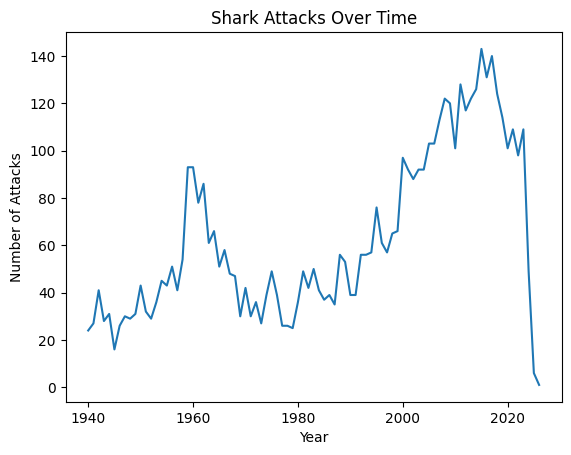

'They seem to be increasing over time from 1920 - 2020'

In [15]:
#2

df = pd.read_excel("/Users/iankariuki/UVADS/Machine-Learning1/hw/wrangling/assignment/data/GSAF5.xls")

#2
df = df.dropna(axis=1, how='all')# Here I drop any columns dont contain data

#3
df["Year"] = pd.to_numeric(df["Year"], errors="coerce") #making sure all values are numeric
df = df[df["Year"] >= 1940] # only past 1939
print(df["Year"].unique()) #checks all the unique years
print(df["Year"].describe())


df.groupby("Year").size().plot(kind="line") #plotting the shark attacks recordings over the years
plt.title("Shark Attacks Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

"""They seem to be increasing over time from 1920 - 2020"""



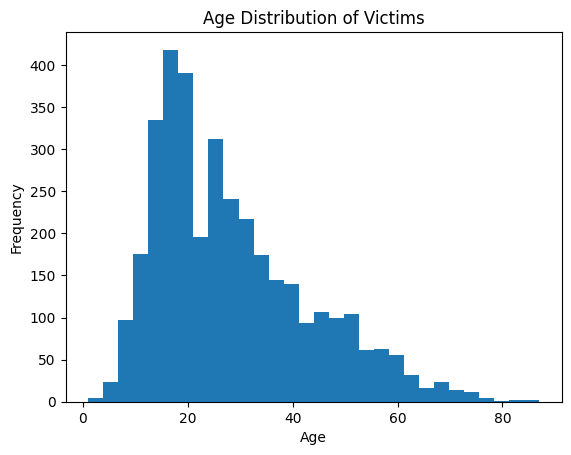

In [16]:
#4
df.columns

df["Age"]
df["Age"] = pd.to_numeric(df["Age"], errors="coerce") #changing them into integers

df = df.dropna(subset=["Age"]) #dropping all values that are NaN in age
df["Age"]

df["Age"].plot(kind="hist", bins=30, title="Age Distribution of Victims") #plotting on histogram
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [17]:
#5
df["Sex"].unique()
df["Sex"] = df["Sex"].str.strip()  # Remove any leading/trailing spaces
df["Sex"] = df["Sex"].replace({"M": "Male", "F": "Female", " M": "Male", "M ": "Male"})  # Standardize values

df["Sex"] = df["Sex"].replace("lli", np.nan)

# Check the cleaned unique values
print(df["Sex"].unique())

male_total = (df["Sex"]=="Male").sum() #amount of male attacks
total_attacks = len(df["Sex"]) #total number of attacks


print("proportion of male attacks =",male_total/ total_attacks)




['Male' 'Female' nan]
proportion of male attacks = 0.8375948300084294


In [25]:
#6
df["Type"].unique()
df["Type"] = df["Type"].where(df["Type"].isin(["Provoked", "Unprovoked"])) #only includinj the unprovoked and provoked
df["Type"].unique()
unprovoked_proportion = df[df["Type"] == "Unprovoked"].shape[0] / len(df["Type"]) #here im finding the proportion of unprovoked attacks
print(unprovoked_proportion)

0.831132340545097


In [37]:
#7

df["Fatal Y/N"].unique()

df["Fatal Y/N"] = df["Fatal Y/N"].where(df["Fatal Y/N"].isin(["Y", "N",],),"Unknown") #only allowing for Y,N, and Unknown

# Check the cleaned unique values
print(df["Fatal Y/N"].unique())

['N' 'Y' 'Unknown']


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?